## Imports

In [235]:
from PIL import Image, ImageFont, ImageDraw

import matplotlib.pyplot as plt
import random
import os
import csv
import cv2

In [236]:
## set default paths
font_path = "fonts"
background = "background/ita_passport_bg.png"
output_path = "out"

font_styles = os.listdir(font_path)
print(font_styles)
data_file = open("data/data.csv", "r", newline='')

['Hack-Italic.ttf', 'Hack-Regular.ttf', 'Hack-Bold.ttf', 'Hack-BoldItalic.ttf']


['NOME_0', 'COGNOME_0', 'CITTADINANZA_0', '02/01/1970', 'F', '11/01/2024', '11/01/2034', 'LUOGO_NASCITA_0']
75
[60, 39, 25]


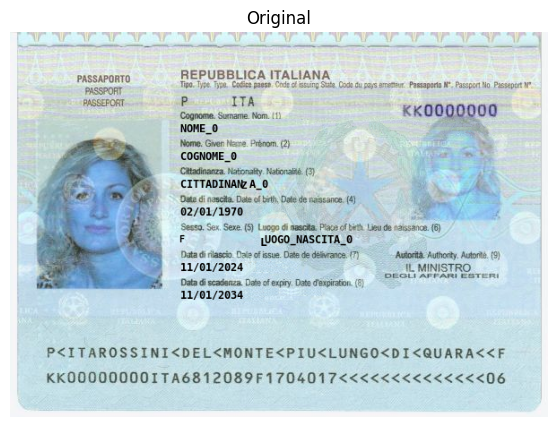

['NOME_1', 'COGNOME_1', 'CITTADINANZA_1', '02/01/1970', 'F', '11/01/2024', '11/01/2034', 'LUOGO_NASCITA_1']
75
[45, 62]


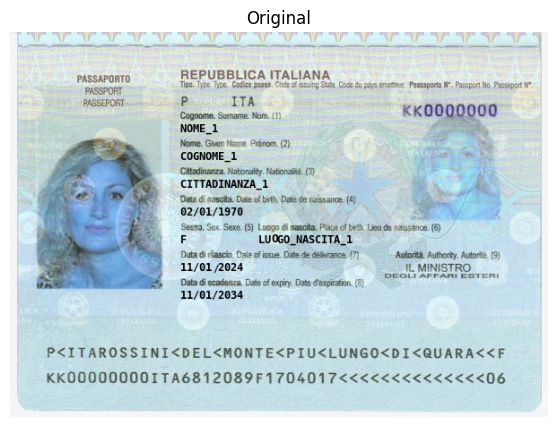

In [237]:
## preparing path
font_style = os.path.join(font_path, font_styles[2])

#loading font
font_size = 12
font = ImageFont.truetype(font_style, font_size)

## color and coordinates definition
color = (0,0,0) #black

csv_reader = csv.reader(data_file)

written_passports = 0

for passport_data in csv_reader:
    print(passport_data)

    image = Image.open(background)
    draw = ImageDraw.Draw(image)

    # n randomico caratteri "falsi"
    length_tot = 0
    for i in range(8):
        #print(len(passport_data[i]))
        length_tot += len(passport_data[i])
    print(length_tot)
    # poniamo che ci siano massimo 5 caratteri falsi per passaporto
    num_false_char = random.randint(0,4)
    index_false_chars = []
    for i in range(num_false_char):
        index_false_chars.append(random.randint(0, length_tot-1))
    print(index_false_chars)

    enum = 0
    for i in range(8):
        for j in range(len(passport_data[i])):   
                if any(enum==el for el in index_false_chars):
                    #print("ok")
                    c_fontstyle = font_style
                    c_fontsize = font_size + random.randint(-2,2)
                    c_font = ImageFont.truetype(c_fontstyle, c_fontsize)
                    if i == 7:
                        coord_string = (190 + 87 + j*7 + random.randint(-2,2), 100 + 31 * 4 + random.randint(-2,2))
                    else:
                        coord_string = (190+j*7 + random.randint(-2,2), 100 + 31 * i + random.randint(-2,2))
                    #print(coord_string)
                    draw.text(coord_string, passport_data[i][j], color, font=c_font)
                else:
                    if i == 7:
                        coord_string = (190 + 87 + j*7, 100 + 31 * 4)
                    else:
                        coord_string = (190+j*7, 100 + 31 * i)
                    #print(coord_string)
                    draw.text(coord_string, passport_data[i][j], color, font=font)
                enum += 1

    #coord_luogonascita = (190 + 87, 100 + 31 * 4)
    #draw.text(coord_luogonascita, passport_data[7], color, font=font)

    file_name = "forged_passport_mod_" + str(written_passports) + ".png"
    image.save(os.path.join(output_path, file_name), quality=100)
    image = cv2.imread(os.path.join(output_path, file_name), cv2.IMREAD_UNCHANGED)
    fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
    ax.imshow(image)
    ax.set_title('Original')
    ax.axis('off')
    plt.show()
    written_passports += 1
